<a href="https://colab.research.google.com/github/saiyedumairashraf/TSF_Task-1/blob/main/TSF_Task2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRIP : THE SPARKS FOUNDATION**

Author : SAIYED UMAIR ASHRAF

Task-2 : Sample Super Store


Problem Statement


To Predict : 

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv('/content/drive/MyDrive/DATA/SampleSuperstore - SampleSuperstore.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [14]:
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [15]:
df.tail()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [16]:
print('shape',df.shape)

shape (9994, 13)


In [17]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [18]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [19]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [20]:
len(df.columns)

13

In [21]:
df.duplicated().sum()


17

In [23]:
x=df.drop_duplicates()

In [24]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**EDA**

***Now lets perform analysis by region to identify thw pproblem***

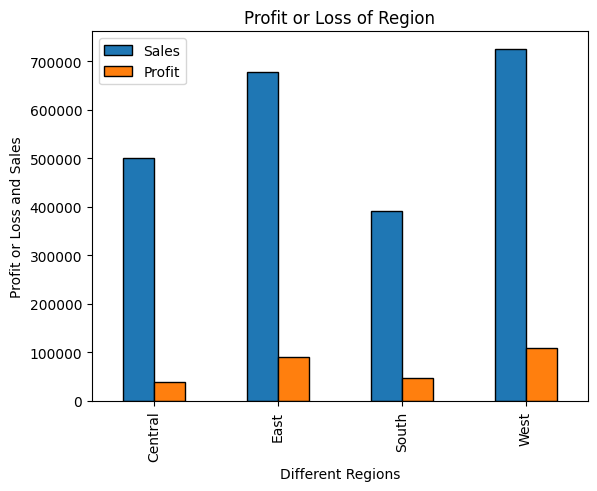

In [133]:
df.groupby("Region")[["Sales","Profit"]].sum().plot.bar(edgecolor="black")
plt.title("Profit or Loss of Region")
plt.xlabel("Different Regions")
plt.ylabel("Profit or Loss and Sales")
plt.show()

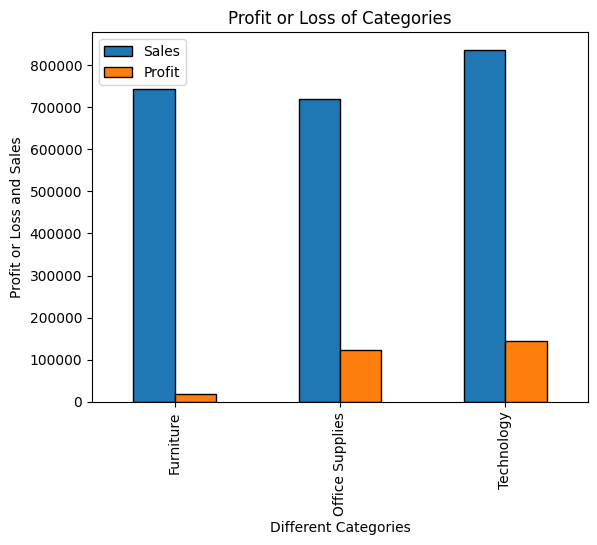

In [134]:
df.groupby("Category")[["Sales","Profit"]].sum().plot.bar(edgecolor="black")
plt.title("Profit or Loss of Categories")
plt.xlabel("Different Categories")
plt.ylabel("Profit or Loss and Sales")
plt.show()

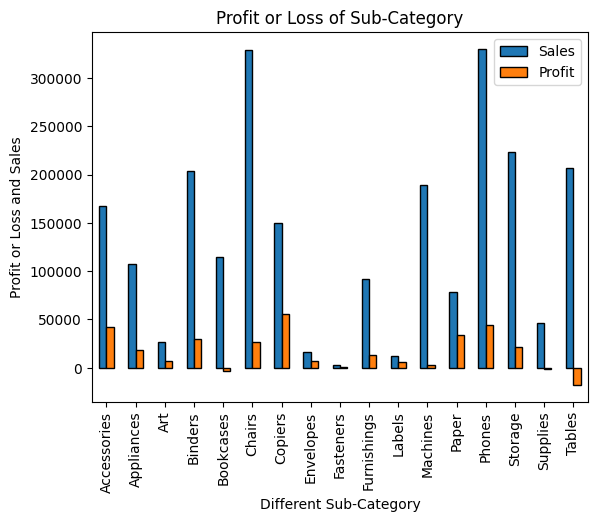

In [135]:
df.groupby("Sub-Category")[["Sales","Profit"]].sum().plot.bar(edgecolor="black")
plt.title("Profit or Loss of Sub-Category")
plt.xlabel("Different Sub-Category")
plt.ylabel("Profit or Loss and Sales")
plt.show()

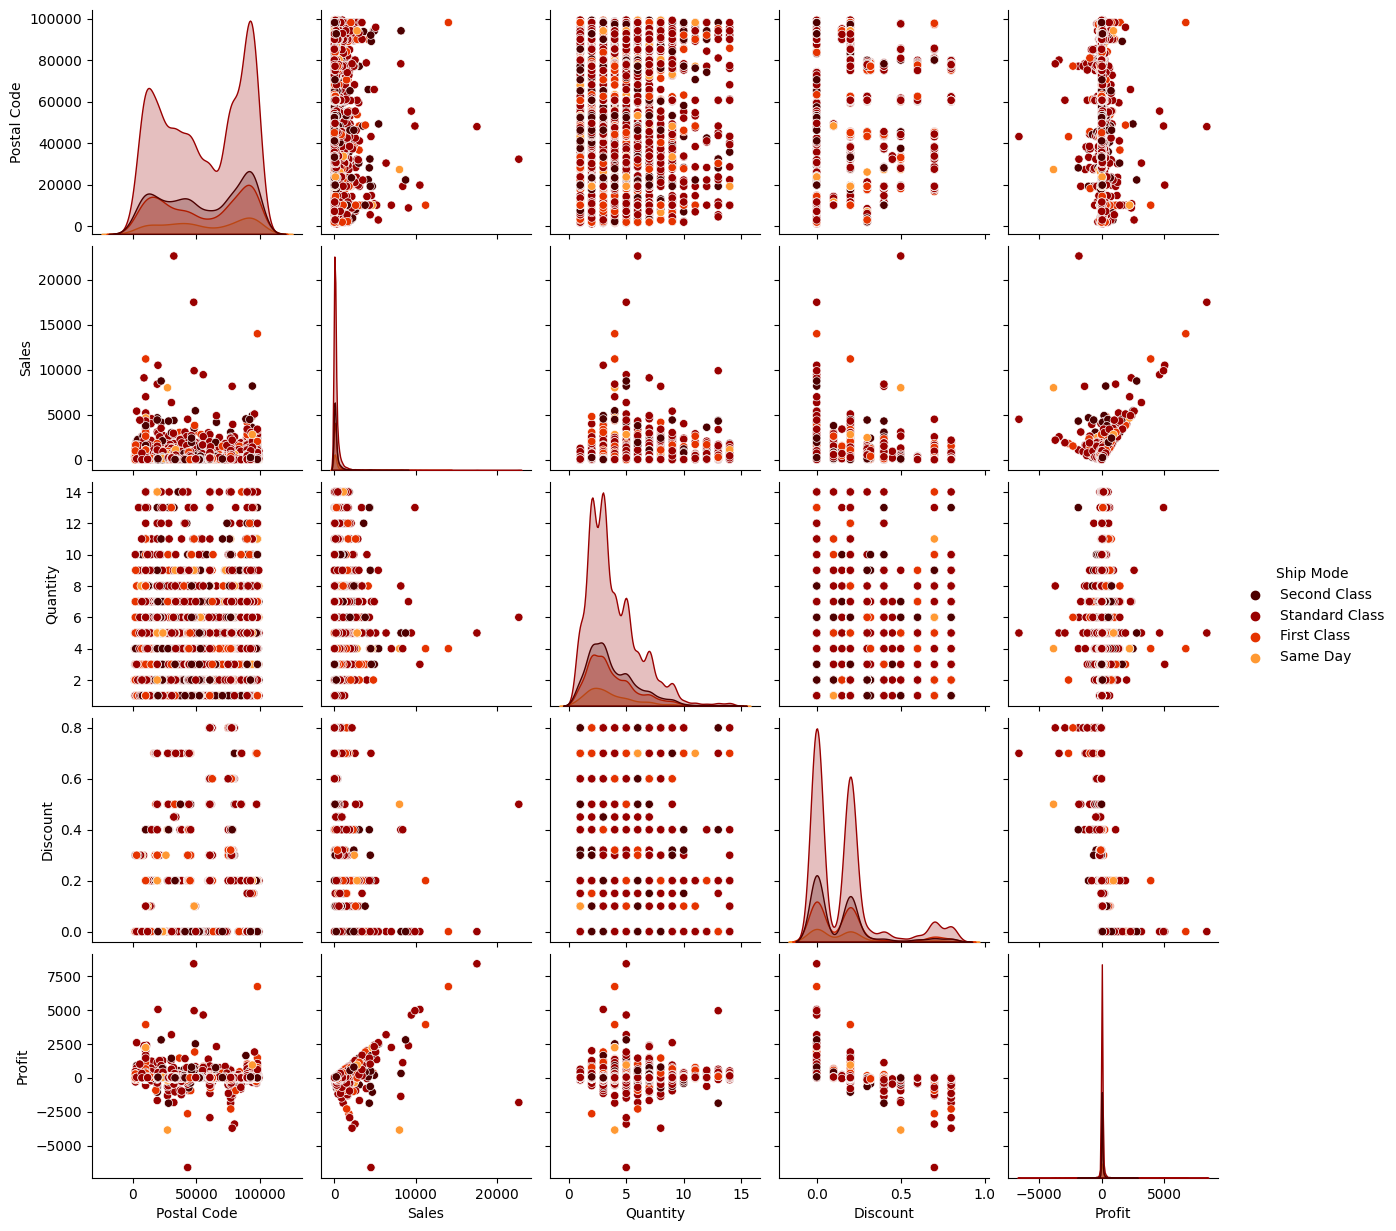

In [96]:
#droping postal code columns to plot
value1=df.drop(['Postal Code'],axis=1)
sns.pairplot(df,hue='Ship Mode', palette='gist_heat')

<Axes: >

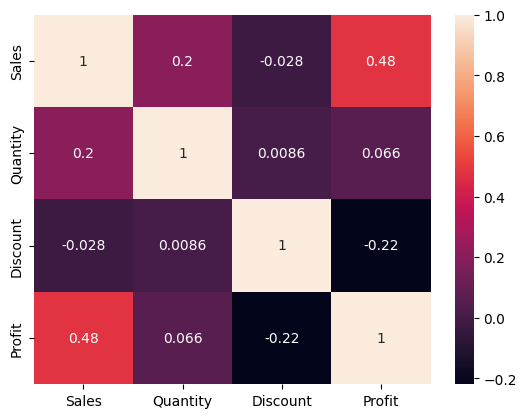

In [95]:
#correlation of  columns
correlation=value1.corr()
sns.heatmap(correlation,annot=True)


In [33]:
#covariance of columns
value1.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


**Explorartory Data Analysis-Data Visualization**


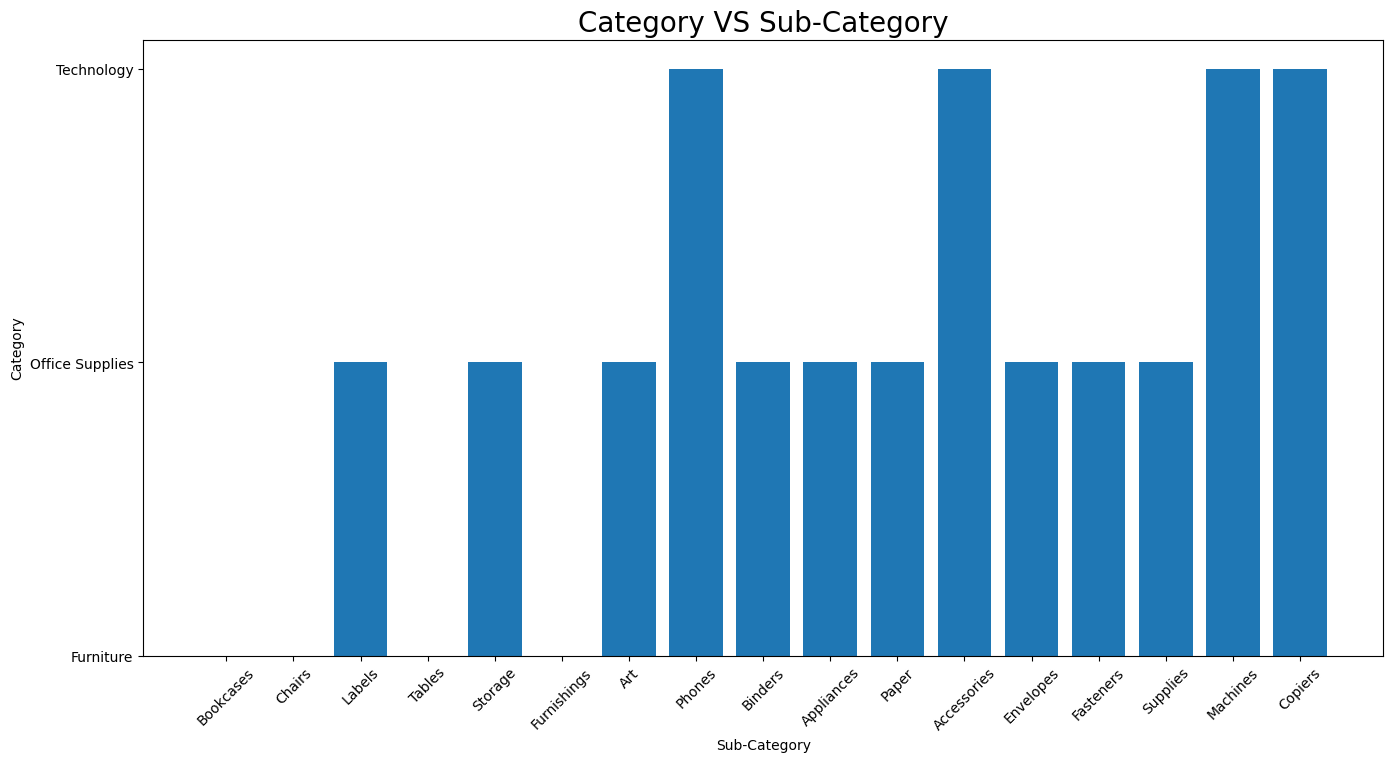

In [34]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=value1)
plt.title('Category VS Sub-Category',fontsize=20)
plt.xlabel('Sub-Category',fontsize=10)
plt.ylabel('Category',fontsize=10)
plt.xticks(rotation=45)
plt.yticks()
plt.show()


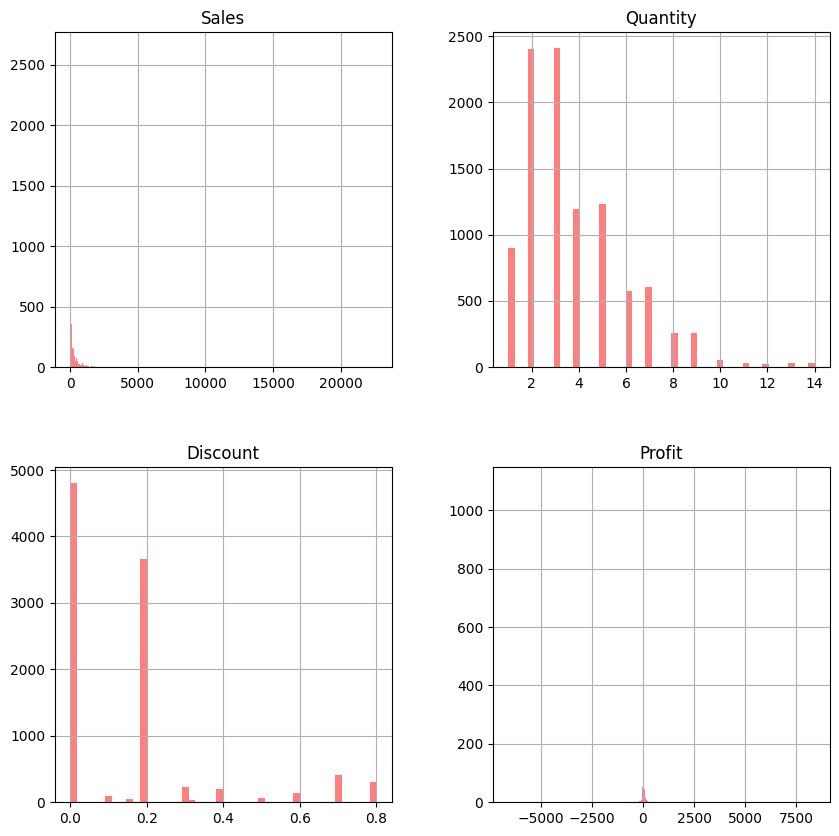

In [35]:
value1.hist(bins='auto',figsize=(10,10),alpha=0.5,color='r')
plt.show()

In [37]:
#count total number of repeatable state
value1['State'].value_counts(ascending=True)

Wyoming                    1
West Virginia              4
North Dakota               7
Maine                      8
District of Columbia      10
Vermont                   11
South Dakota              12
Montana                   15
Idaho                     21
Kansas                    24
New Hampshire             27
Iowa                      30
New Mexico                37
Nebraska                  38
Nevada                    39
Louisiana                 42
South Carolina            42
Mississippi               53
Utah                      53
Rhode Island              56
Arkansas                  60
Alabama                   61
Missouri                  66
Oklahoma                  66
Connecticut               82
Minnesota                 89
Delaware                  96
Maryland                 105
Wisconsin                110
Oregon                   124
New Jersey               130
Massachusetts            135
Kentucky                 139
Indiana                  149
Colorado      

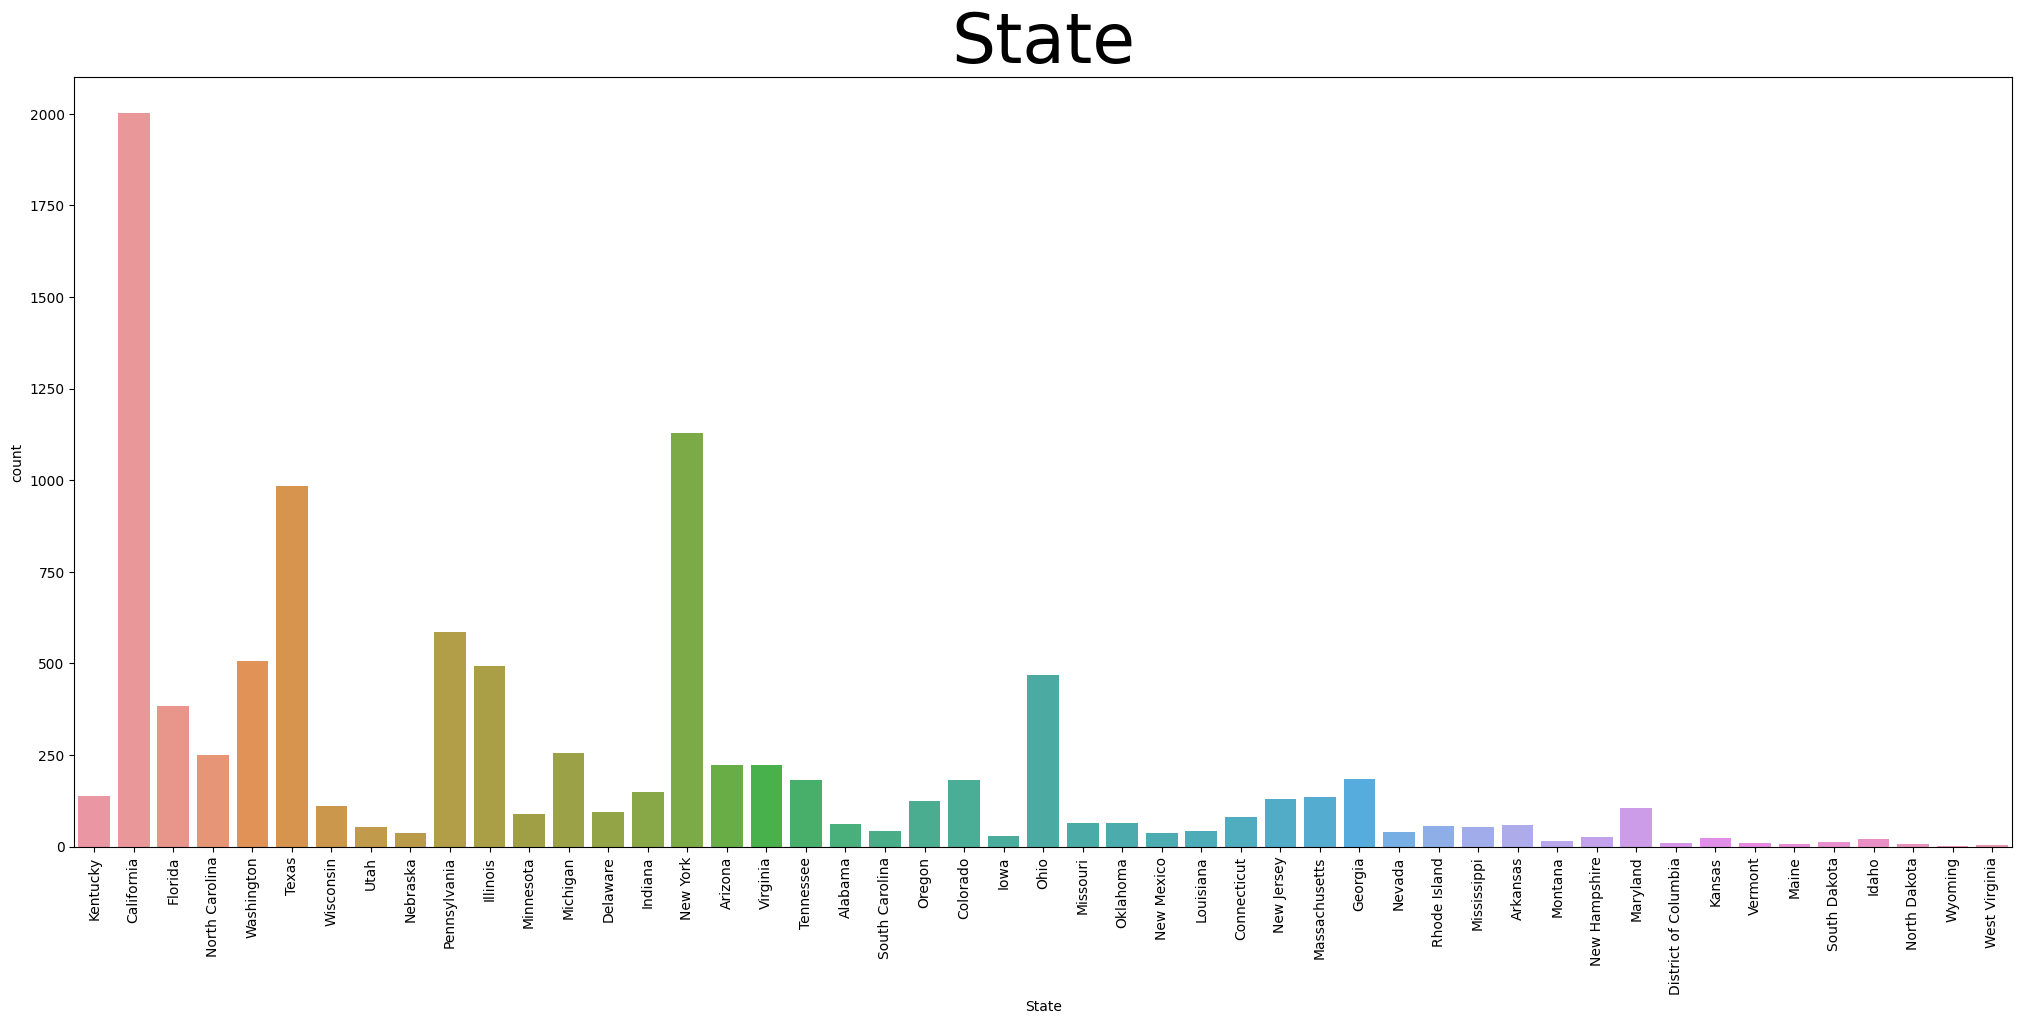

In [57]:
plt.figure(figsize=(25,10))
sns.countplot(x=value1['State'])
plt.xticks(rotation=90)
plt.title('State',fontsize=50)
plt.show()

In [97]:
#percentage distribution of ship mode
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [101]:
df_second=df[df['Ship Mode']=="Second Class"]
df_standard=df[df['Ship Mode']=="Standard Class"]
df_first=df[df['Ship Mode']=="First Class"]
df_same=df[df['Ship Mode']=="Same Day"]

In [106]:
x=['Second Class', 'Standard Class', 'First Class', 'Same Day']
y=[len(df_second.index),len(df_standard.index),len(df_first.index),len(df_same.index)]

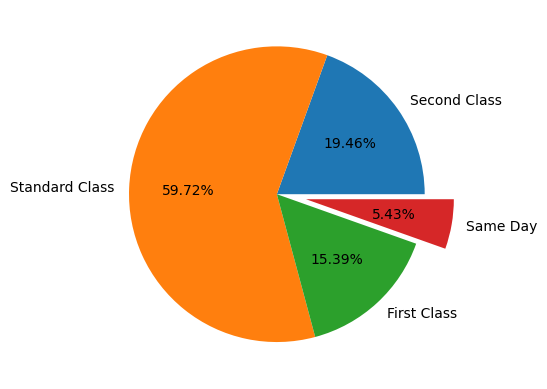

In [130]:
plt.pie(y,labels=x,autopct="%1.2f%%",explode=(0,0,0,0.2))
plt.grid(True)
plt.show()


*** Business Problems that were derived by Exploring the DATA***


Discount has no effect on Quantity sold.

Improvement needed in Same Day Shipment Mode.

Profit and Sales are maximum in consumer segment and minimum in home office segment.

Highest number of buyers are from California and New York.

Improvements needed in Southern Region.

Maximum Profits are from binders, papers, furnishings, phones, storage, art, accessories and minimum from supplies, machines, copiers(very less).

Loss in Texas, pennsylvania and Ohio.

Technology and Office Supplies have high profit whereas Furniture has less profit.

Phone sub-categories have high sales, Chairs have high sale but less profit, whereas, Tables and Bookcases sub-categories are facing huge losses.

Profit and Sales are not related.